In [3]:
# modules
import pandas as pd
import sys
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


import ndx_ecog  # Even though we won't use this directly, we need to import it when reading our NWB files since we use the ECoG extension
from pynwb import NWBHDF5IO
from changlab_to_nwb.TDT_to_NWB import TDTtoNWB
from mne.io import RawArray
from mne import create_info, find_events, Epochs, concatenate_epochs

# paths
root_dir = '/Users/jenndisanto/Documents/2022/changlab-rotation'
plot_dir = '%s/vis' % (root_dir)
textgrid_dir = '%s/external/TextGrids' % (root_dir)


In [4]:
# helper script to get timing from the textgrids
def event_timing(word, amb_level, tg_dir, time_lock):
    from glob import glob

    # build fname"
    fname = glob('%s/*_%s_*%s*.TextGrid' % (textgrid_dir, word, int(amb_level)))[0]

    # load file
    tg = pd.read_csv(fname)

    # lock to moment
    if time_lock == 'POD':
        for ii in range(len(tg)):
            if 'POD' in str(tg.values[ii]):
                pod_timing = float(str(tg.values[ii+5]).split('= ')[1].split(' ')[0])

    elif time_lock == 'word_offset':
        for ii in range(len(tg)):
            if 'word' in str(tg.values[ii]):
                pod_timing = float(str(tg.values[ii+2]).split('= ')[1].split(' ')[0])

    return pod_timing

In [5]:
def rolling_window(array, window_size, freq):
    shape = (array.shape[0] - window_size + 1, window_size)
#     print(shape)
    strides = (array.strides[0],) + array.strides
#     print(strides)
    rolled = np.lib.stride_tricks.as_strided(array, shape=shape, strides=strides)
    return rolled[np.arange(0, shape[0], freq)]


In [6]:
subject = 'EC243'
block = '48'
'''
subject:    str, e.g. "EC228"
blocks:     list, e.g. ['35', '36']
data_type:  str, options: "LFP", "high_gamma"
time_lock:  str, options: "word_onset", "POD", "word_offset"
tmin:       float, seconds
tmax:       float, seconds
'''

# paths
data_dir = '%s/data-ecog' % (root_dir)
logfile_dir = '%s/data/logfiles' % (root_dir)

# loop through blocks to get epochs
epoch_list = list()

print('Analysing data for %s B%s..' % (subject, block))

# load log file
log = pd.read_csv('%s/%s_sequence_B%s.csv' % (logfile_dir, subject, block))

# clean log file to just get auditory trials
log = log.query("stim_number > 0")

# read nwb file
nwb_path = '%s/%s_B%s.nwb' % (data_dir, subject, block)
nwb_file_io = NWBHDF5IO(nwb_path, 'r')
nwb_file = nwb_file_io.read()

#         print(nwb_file.stimulus['speaker1'].data[0:100])

speaker_data = nwb_file.stimulus['speaker1'].data[0:int(13745118/10)]

data_len = speaker_data.shape[0]
figure(figsize=(16, 6), dpi=80)


speaker_rate = nwb_file.stimulus['speaker1'].rate
silence_thresh = 0.08
silence_len = int(0.5 * speaker_rate)


data_bool = speaker_data > silence_thresh
# print(sum(data_bool))
windows = rolling_window(data_bool, silence_len, 1)
# print(sum(windows[0]))
silent_windows = ~np.array(list(map(np.any, windows)))
# print(sum(silent_windows))
switches = silent_windows[:-1] > silent_windows[1:]
# print(sum(switches))
idx = np.where(switches == True)
# print(silent_windows)
print(idx)
print(len(idx))

Analysing data for EC243 B48..
(array([ 243704,  336696,  423646,  527365,  606399,  686065,  771193,
        893795,  985962, 1059817, 1149244, 1254623, 1348200]),)
1


<Figure size 1280x480 with 0 Axes>

In [9]:
a = np.reshape(idx, len(idx[0]))
print(np.shape(a))


IndexError: invalid index to scalar variable.

In [8]:
speaker_rate

24414.0625

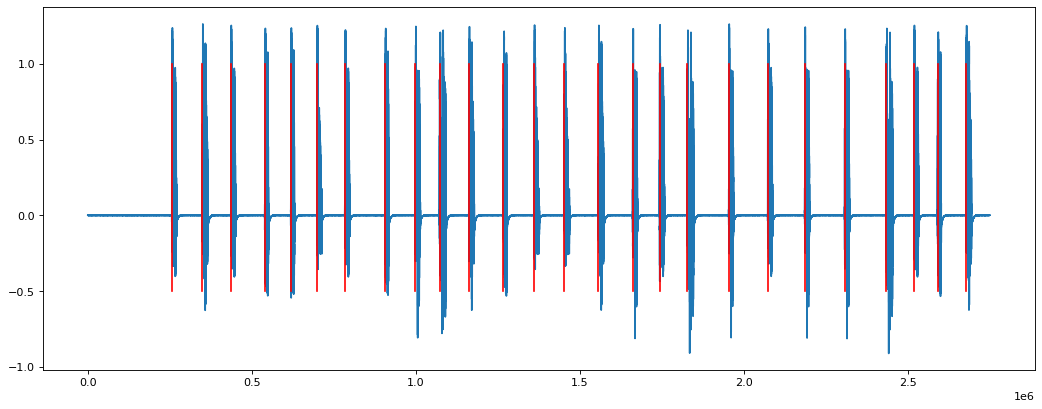

In [6]:
figure(figsize=(16, 6), dpi=80)
start = 255700
snip = speaker_data[start:257000]
x = np.arange(len(snip))
# print(idx[0][0])
# plt.plot([idx[0][0]-start+silence_len,idx[0][0]-start+silence_len], [-0.5,1], color='r')
plt.plot(np.arange(len(speaker_data)), speaker_data)
for i in idx:
    plt.plot([i+silence_len,i+silence_len], [-0.5,1], color='r')

In [ ]:
#3-5ms jitter
#check consistency within word
#timelock ecog to onets - space & time distribution
#matrix trials x time x space
#start by averaging over first 200ms and over trials and plot magnitude in a grid of electrodes to find intereting electrodes
#16x16 electrode grid
#plot trials vs time


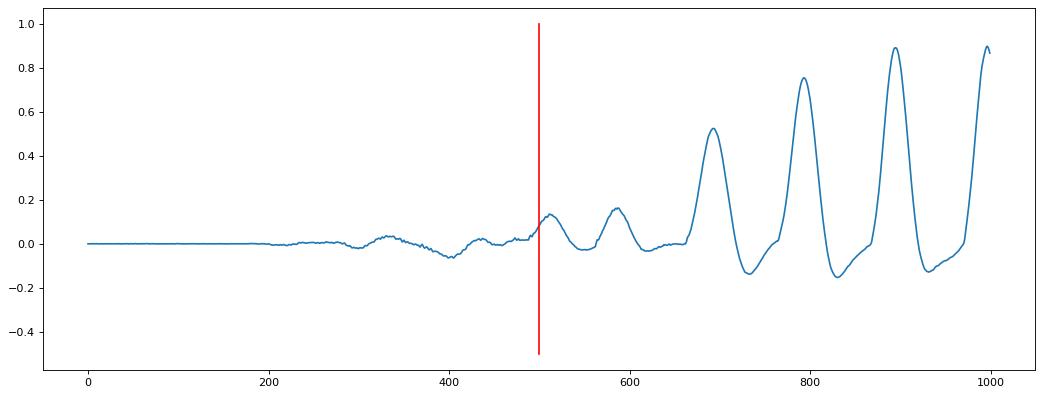

In [7]:
figure(figsize=(16, 6), dpi=80)
i = idx[0][9] + silence_len
window = 1000
plt.plot(np.arange(window), speaker_data[i-500 : i+500])
plt.plot([500,500], [-0.5,1], color='r')

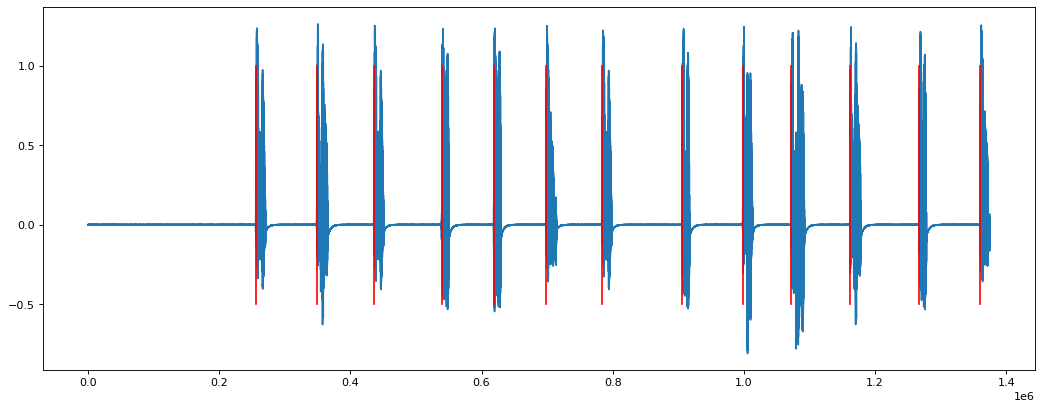

In [66]:
figure(figsize=(16, 6), dpi=80)
start = 255700
snip = speaker_data[start:257000]
x = np.arange(len(snip))
# print(idx[0][0])
# plt.plot([idx[0][0]-start+silence_len,idx[0][0]-start+silence_len], [-0.5,1], color='r')
plt.plot(np.arange(len(speaker_data)), speaker_data)
for i in idx:
    plt.plot([i+silence_len,i+silence_len], [-0.5,1], color='r')

In [15]:
print(idx)

(array([], dtype=int64),)


In [17]:
.5*24414

12207.0

In [48]:
a = np.array([-2, 1])
if all(x < 2 for x in np.abs(a)): print("ya")


In [ ]:
13745118

In [21]:
int(13745118/10)

1374511

In [61]:
True < True

False

In [106]:
a = [[True, True, True], [False, False, False], [True, True, True]]
b = [False, False, False]
c = ~np.array(list(map(np.any, a)))
print(c)
# print(np.any(b))
# print(np.any(a))

[False  True False]


In [95]:
a = np.array([-1, 2, 3])
b = a < 0
b

array([ True, False, False])

In [ ]:
#         print(len(speaker_data)
#         print(len(switches))

#         while window_max < data_len - 1:
#             #move window
#             if window_min % 100 == 0: print(window_min/data_len)
#             window_min += 1
#             window_max += 1
#             window = np.abs(speaker_data[window_min : window_max])
            
#             if silent:
#                 #if updated window crosses threshold, we found a word onset
#                 if np.abs(speaker_data[window_max]) >= silence_thresh:
#                     onsets.append(window_max)
#                     silent = False
#             else:
#                 #check if updated window is silent
#                 if all(x < silence_thresh for x in np.abs(window)):
#                     silent = True
                
#         print(len(onsets))
#         # load ecog
#         if data_type == 'raw':
#             ecog = nwb_file.acquisition['LFP']
#         elif data_type == 'high_gamma':  # this is for data that has been preprocessed through ecogVis
#             ecog = nwb_file.processing['ecephys']['high_gamma']
#         elif data_type == 'LFP':
#             ecog = nwb_file.processing['ecephys']['LFP']['preprocessed']
#         ecog_array = ecog.data.__array__()

        # get params of the data
#         sfreq = ecog.rate
# #         print('sfreq')
# #         print(sfreq)
#         ch_names = nwb_file.electrodes.label.data.__array__().tolist()
#         bads_bool = nwb_file.electrodes['bad'].data.__array__()

#         # set bads to zero
#         ecog_array[:, bads_bool] = 0

#         # zscore raw
#         ecog_array = zscore(ecog_array, axis=0)

#         # get time stamps (i think these aren't perfect -- check them)
#         event_samples = nwb_file.intervals['TimeIntervals_speaker']['start_time'].data.__array__()
#         plt.plot(event_samples)
#         event_times = event_samples * sfreq

#         # time lock options
#         if time_lock == 'POD' or time_lock == 'word_offset':
#             event_shifts = list()
#             for word, amb_level in log[['auditory_word', 'ambiguity']].values:
#                 shift = event_timing(word, amb_level, textgrid_dir, time_lock)
#                 event_shifts.append(int(shift*sfreq))
#             event_shifts = np.array(event_shifts)

#         else:
#             event_shifts = np.zeros(len(log))

#         # put this into an mne raw object
#         info = create_info(ch_names, sfreq, ch_types='ecog')
#         raw = RawArray(ecog_array.T, info)
#         raw.info['bads'] = np.array(raw.info['ch_names'])[bads_bool].tolist()

#         # make epochs
#         events = np.array([[0, 0, 0]]*len(event_times))
#         events[:, 0] = [int(t) for t in event_times] + event_shifts
#         epochs = Epochs(raw, events, tmin=tmin, tmax=tmax, metadata=log, preload=True,
#                         baseline=None)
#         epoch_list.append(epochs)
    
    # need to fix this -- bads need to be the same over blocks
#     ep_info = epoch_list[0].info
#     for eps in epoch_list:
#         eps.info = ep_info

#     # concatenate the epochs together
#     epochs = concatenate_epochs(epoch_list)

#     # add properties to metadata
    
#     # mirror slider so that the numbers match the acoustics not the lexical
#     acoustic_slider = list()
#     binned_responses = list()
#     flips = ['desolate', 'beneficial', 'mountains']
#     for word_end, slider_resp, block_type in epochs.metadata[['word_end',
#                                                               'slider.response',
#                                                               'block_type']].values:

#         # depends on the block type
#         if block_type == 1:
#             if word_end in flips:
#                 val = np.abs(slider_resp - 11)
#             else:
#                 val = slider_resp
#             acoustic_slider.append(val)

#         # depends on block type
#         if block_type == 2:
#             if word_end in flips:
#                 val = slider_resp
#             else:
#                 val = np.abs(slider_resp - 11)
#             acoustic_slider.append(val)

#         # a categorisation of behaviour into three classes
#         if val < 2:
#             binned_responses.append(1)
#         elif val >= 2 and val < 8:
#             binned_responses.append(2)
#         elif val >= 8:
#             binned_responses.append(3)

#     epochs.metadata['binned_responses'] = binned_responses
#     epochs.metadata['acoustic_slider'] = acoustic_slider

#     return epochs
